In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, Sequential, datasets
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import os
import numpy as np
import matplotlib.pyplot as plt

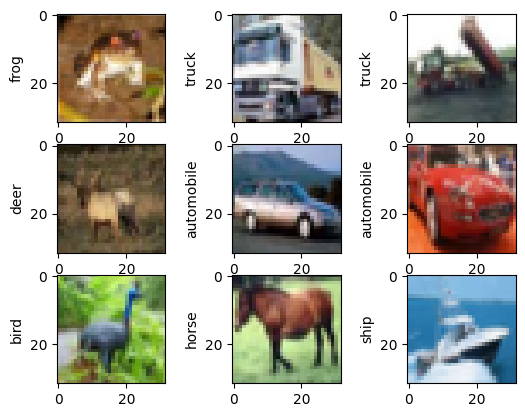

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog', 6:'frog',7:'horse',8:'ship',9:'truck'}
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.ylabel(category_dict[y_train[i][0]])
plt.show()

In [4]:
# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
def CNN_classification_model(input_size=x_train.shape[1:]):
    model = Sequential()
    # First block layer
    model.add(Conv2D(32, (3,3), padding='same', input_shape=input_size))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=1))
    # Second block layer
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # Send feature map into a fully connected layer
    model.add(Flatten()) # Flatten first
    # Fully connected layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(.25)) # Dropout layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    # Optimizer
    opt = optimizers.Adam(learning_rate=0.0001)
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
model = CNN_classification_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                        

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint   
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss', verbose=1, save_best_only=True)

trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
    model.load_weights(trained_weights_path, by_name=True)
# Train
model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[model_checkpoint], verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 0.3165 - accuracy: 0.8855
Epoch 1: loss improved from inf to 0.31653, saving model to final_cifar10.h5
1563/1563 [==============================] - 146s 94ms/step - loss: 0.3165 - accuracy: 0.8855
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.8957
Epoch 2: loss improved from 0.31653 to 0.29214, saving model to final_cifar10.h5
1563/1563 [==============================] - 165s 105ms/step - loss: 0.2921 - accuracy: 0.8957
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2601 - accuracy: 0.9073
Epoch 3: loss improved from 0.29214 to 0.26013, saving model to final_cifar10.h5
1563/1563 [==============================] - 174s 111ms/step - loss: 0.2601 - accuracy: 0.9073
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2453 - accuracy: 0.9135
Epoch 4: loss improved from 0.26013 to 0.24530, saving model to final_cifar10.h5
1563

In [21]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')

model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 4s 14ms/step - loss: 1.3609 - accuracy: 0.7107


[1.3609004020690918, 0.7106999754905701]

In [22]:
new_model.predict(x_test[0:1])

1/1 [==============================] - 0s 103ms/step


array([[5.0571852e-11, 6.9741386e-09, 1.3787740e-10, 9.9977916e-01,
        3.3681334e-13, 2.1189720e-04, 7.9253059e-06, 4.3449250e-10,
        1.0564756e-06, 3.7668358e-11]], dtype=float32)

In [23]:
# output the predicted label
prediction = new_model.predict(x_test[0:1])
predicted_label = np.argmax(prediction, axis=-1)
print("Predicted Class Label:", predicted_label)

1/1 [==============================] - 0s 18ms/step
Predicted Class Label: [3]


1/1 [==============================] - 0s 21ms/step


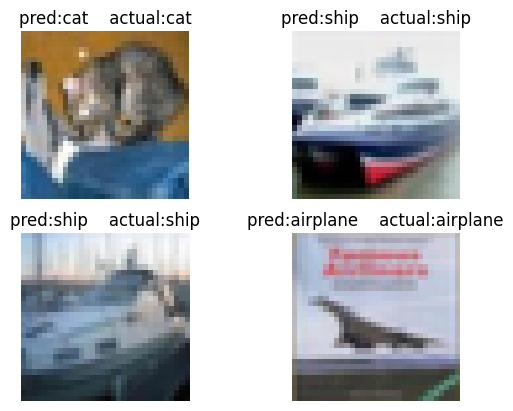

In [25]:
pred_list = []

plt.figure()
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.imshow(x_test[i])
    pred = new_model.predict(x_test[0:10])
    pred_label = pred.argmax(axis=1)
    pred_list.append(pred_label)
    plt.title("pred:"+category_dict[pred_label[i]]+"    actual:"+category_dict[y_test[i][0]])
    plt.axis('off')
plt.show()